# 2.1 パーセプトロンとは

複数の信号を入力として受取、ひとつの信号を出力するもの。

<img src="./img/パーセプトロン.png">

総和が閾値を超えた場合に１を出力する <br>
Y = <br>
 0 (w1x1 + w2x2 ≦ θ）<br>
 1 (w1x1 + w2x2 ＞ θ）<br>

# 2.2 単純な論理回路　～　2.3 パーセプトロンの実装

##### 重みとバイアスの導入
扱いやすいようにパーセプトロンの式を以下のように変更する <br>
Y = <br>
 0 (b+w1x1 + w2x2 ≦ 0）<br>
 1 (b+w1x1 + w2x2 ＞ 0）<br>
bをバイアスと呼び、wを重みと呼ぶ

##### AND関数
x1,x2,yでAND関数を満たすように、bとwを設定する。無限にあるため以下は一例。

In [1]:
import numpy as np
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [3]:
AND(0,0)

0

In [4]:
AND(1,0)

0

In [5]:
AND(0,1)

0

In [6]:
AND(1,1)

1

##### NANDも同じ要領で作成

In [7]:
import numpy as np
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

##### ORも

In [8]:
import numpy as np
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

# 2.4 パーセプトロンの限界

##### XOR
XOR(排他的論理和）は単純なパーセプトロンでは実装できない<br>
図にするとわかるが、１本の直線では表現できない<br>
OR,AND,NAND３つを利用すると実装できる

In [9]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

# 2.5 多層パーセプトロン

XORで見たように、単純なパーセプトロンでは実現できないものでも、層を重ねることにより表現できる！<br>
<img src="./img/xor.png">

# 2.6 NANDからコンピューターへ

実はコンピューターはNANDだけで作ることができる。→つまりパーセプトロンの組み合わせだけで作ることができる！

# ステップ関数
入力が０を超えたら１を出力し、それ以外は０を出力

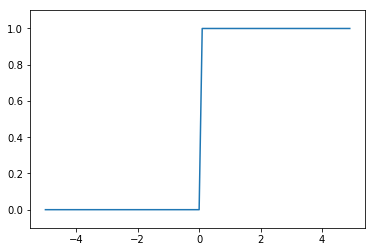

In [12]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    #各要素に対して、0より大きければTrueを返す
    #それをintで返す。すなわち、True=1
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1) # -5から5まで0.1ずつ
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # 図で描画するy軸の範囲を指定
plt.show()

# シグモイド関数
負数は0に近づく、正の数は１に近づく
ニューラルネットワークでよく使われる関数

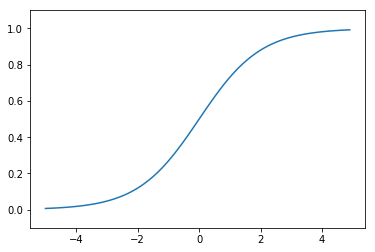

In [13]:
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # シグモイド関数の計算式

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1) # y軸の範囲
plt.show()

# ReLU関数
最近ではシグモイド関数に代わってよく使われる

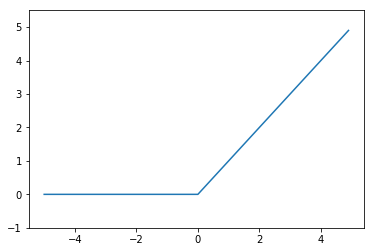

In [14]:
import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

# 多次元配列の計算

##### 一次元の場合

In [15]:
A = np.array([1,2,3,4])
A

array([1, 2, 3, 4])

In [16]:
np.ndim(A) #配列の次元数

1

In [17]:
A.shape #配列の形状

(4,)

##### 二次元の場合

In [20]:
B = np.array([[1,2],[3,4],[5,6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [21]:
np.ndim(B)

2

In [22]:
B.shape #３行２列

(3, 2)

##### 行列の積

In [24]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

# 出力層の設計

##### 恒等関数
入力をそのまま出力する。回帰問題で使われる

##### ソフトマックス関数
以下関数で定義される。分類問題で使われる

In [26]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) #オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

・ソフトマックス関数の出力は０～１になる
・出力の総和は１になる　→　確率として解釈することができる

##### 出力層のニューロン数

・分類の場合、分類したいクラスの数に設定する（１０個に分類したい場合は出力層を１０個にする）
・一番値の大きい（確率が高い）出力が正解